## Explorating the Tree of Life

<table><tr><td>
<img src="https://i.guim.co.uk/img/static/sys-images/Guardian/Pix/pictures/2008/04/17/DarwinSketch.article.jpg?width=445&quality=85&auto=format&fit=max&s=c7f89552d12b8495b2b4eb4d7a5bc391" width=200><a href="https://i.guim.co.uk/img/static/sys-images/Guardian/Pix/pictures/2008/04/17/DarwinSketch.article.jpg?width=445&quality=85&auto=format&fit=max&s=c7f89552d12b8495b2b4eb4d7a5bc391">source</a></td><td><img src="http://www.greennature.ca/greennature/taxonomy/tree_of_life.png" width=300><a href="http://www.greennature.ca/greennature/taxonomy/tree_of_life.png">source</a></td></tr></table>

In this hands-on exercise, you answer the following questions by using pandas data structures and methods to analyze the eukaryote genome data store in the following tab-delimited file. https://raw.githubusercontent.com/csbfx/advpy122-data/master/euk.tsv

In [ ]:
import pandas as pd
%matplotlib inline

# this input file is tab-delimited instead of comma-delimited
tsvFile = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/euk.tsv"
# Load the csv file into a dataframe
euk = pd.read_csv(tsvFile, sep="\t")
euk

,Species,Kingdom,Class,Size (Mb),GC%,Number of genes,Number of proteins,Publication year,Assembly status
0,Emiliania huxleyi CCMP1516,Protists,Other Protists,167.676000,64.5,38549,38554,2013,Scaffold
1,Arabidopsis thaliana,Plants,Land Plants,119.669000,36.0529,38311,48265,2001,Chromosome
2,Glycine max,Plants,Land Plants,979.046000,35.1153,59847,71219,2010,Chromosome
3,Medicago truncatula,Plants,Land Plants,412.924000,34.047,37603,41939,2011,Chromosome
4,Solanum lycopersicum,Plants,Land Plants,828.349000,35.6991,31200,37660,2010,Chromosome
...,...,...,...,...,...,...,...,...,...
8297,Saccharomyces cerevisiae,Fungi,Ascomycetes,3.993920,38.2,-,-,2017,Scaffold
8298,Saccharomyces cerevisiae,Fungi,Ascomycetes,0.586761,38.5921,155,298,1992,Chromosome
8299,Saccharomyces cerevisiae,Fungi,Ascomycetes,12.020400,38.2971,-,-,2018,Chromosome
8300,Saccharomyces cerevisiae,Fungi,Ascomycetes,11.960900,38.2413,-,-,2018,Chromosome


## Q1. How many Mammals have at least 20,000 genes? What are their scientific names?
*Note:*
- *Mammals are under Class*
- *Scientific names are under Species*


In [ ]:
# Your code here . . .
euk['Number of genes'] = pd.to_numeric(euk['Number of genes'], errors = 'coerce')
euk[(euk.Class == 'Mammals') & (euk['Number of genes'] >= 20000)].Species

,Species
44,Homo sapiens
45,Mus musculus
65,Rattus norvegicus
70,Felis catus
74,Bos taurus
...,...
4977,Rattus norvegicus
5087,Macaca mulatta
5152,Macaca fascicularis
5180,Cricetulus griseus


### Q2. Animals are a part of Kingdom. How many records are there for each Class of Animals?

In [ ]:
# Your code here . . .
euk.Kingdom.value_counts()

,count
Kingdom,
Fungi,4494
Animals,2181
Plants,870
Protists,727
Other,30


### Q3. Animals are a part of Kingdom. How many unique Species are there for each Class of Animals?

In [ ]:
# Your code here . . .
for kingdom in euk.Kingdom.unique():
    print(kingdom, euk[euk.Kingdom == kingdom].Species.nunique())

Protists 449
Plants 464
Fungi 2554
Animals 1442
Other 27


### Q4. What are the unique scientific names of Mammals with the genus name Macaca?
*Recall: the scientific name starts with genus followed by a space and then the species name. Example: Homo sapiens, where Homo is the genus name and sapiens is the species name.*

In [ ]:
# Your code here . . .
euk['Genus'] = euk.Species.str.split(" ").str[0]
for name in euk[(euk.Class == 'Mammals') & (euk['Genus'] == "Macaca")].Species.unique():
    print(name)

Macaca mulatta
Macaca fascicularis
Macaca nemestrina
Macaca fuscata fuscata


### Q5. Modify the Species names to only contain the scientific names  and create a new dataframe.

Some of the names in the Species column have more than two parts, such as `Emiliania huxleyi CCMP1516`. Create a new column `Species` that contains only the first two parts of name, such as `Emiliania huxleyi`. Combine this new Species column with `Kingdom`, `Class`, `Size (Mb)`, `Number of genes`, and `Number of proteins` and store this new dataframe as `df_species`.

Hint: Follow Q3 in Lecture 4 with a little twist. Instead of just getting the first element from the split results, you will get the first two elements using `.str[0:2]` which will give you a list. You can then use `.str.join(" ")` to change it back to a string.

In [ ]:
# Your code here . . .
scientific_name = euk.Species.str.split().str[0:2]
scientific_name = scientific_name.str.join(" ")

euk['Species'] = scientific_name
df_species = euk[['Species', 'Kingdom', 'Class', 'Size (Mb)', 'Number of genes', 'Number of proteins']]
df_species

,Species,Kingdom,Class,Size (Mb),Number of genes,Number of proteins
0,Emiliania huxleyi,Protists,Other Protists,167.676000,38549.0,38554
1,Arabidopsis thaliana,Plants,Land Plants,119.669000,38311.0,48265
2,Glycine max,Plants,Land Plants,979.046000,59847.0,71219
3,Medicago truncatula,Plants,Land Plants,412.924000,37603.0,41939
4,Solanum lycopersicum,Plants,Land Plants,828.349000,31200.0,37660
...,...,...,...,...,...,...
8297,Saccharomyces cerevisiae,Fungi,Ascomycetes,3.993920,NaN,-
8298,Saccharomyces cerevisiae,Fungi,Ascomycetes,0.586761,155.0,298
8299,Saccharomyces cerevisiae,Fungi,Ascomycetes,12.020400,NaN,-
8300,Saccharomyces cerevisiae,Fungi,Ascomycetes,11.960900,NaN,-


### Q6. Create a pie plot using pandas to show the number of unique Species in each Class of Animals using the new dataframe you created in Q5
Hint: First, create a new dataframe that contains the number of unique Species and the index is the corresponding Animals Class. Then, use that dataframe to plot the pie plot.
[Check out this documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html)

In [ ]:
# Create a new dataframe that contains the number of unique Species and
# the index is the corresponding Animals Class.

# Your code here . . .
df_pie = df_species.drop_duplicates(subset = 'Species')
df_pie = df_pie.Class.value_counts()
df_pie

,count
Class,
Ascomycetes,1270
Basidiomycetes,401
Insects,360
Land Plants,359
Mammals,296
Fishes,217
Other Protists,198
Other Animals,169
Birds,140


<Axes: ylabel='count'>

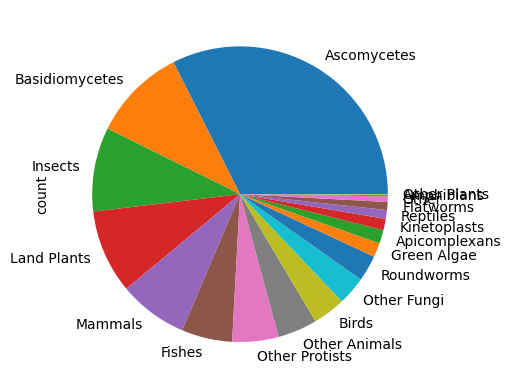

In [ ]:
# Create a panda pie plot using the dataframe above

# Your code here . . .
df_pie.plot.pie()